----
# Laboratorium 6 - Układy stabilne i minimalnofazowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----

* badanie stabilności układu (stabilność w sensie BIBO) 
* analiza układów zamkniętych pętlą sprzężenia zwrotnego
* analiza układów minimalnofazowych
* zera i bieguny transmitancji  

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
poles_figsize  =(8, 8)
default_figsize=(14, 8)

---- 
## 1. Pojęcie stabilności
---- 
* Co to znaczy że układ jest stabilny?
* Jakie są kryteria stabilności?
* Jak sprawdzić czy układ jest stabilny?

---- 
## 2. Zbadaj stabilność w sensie BIBO
---- 
| | |
|------------------------------------------|------------------------------------|
|$$H(s) = {{s^2-2s+3} \over {s^2+2s+ 1}}$$  |  $$H(s) = {{s^2+1}\over{s^2+3s+1}}$$|
|$$ H(s) = {{1} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +8s+15}} $$|
|$$ H(s) = {{s^2-2s+3} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +6s-7}} $$|
|$$ H(s) = {{s + 2} \over {s + 1}} $$  |$$ H(s) = {{1} \over {s+1}} $$|
|$$ H(s) = {{s - 1} \over {s + 1}} $$|$$ H(s) = {{1} \over {s-1}} $$|
|$$ H(s) = {{2s+3} \over {s^2 + 4s + 4}} $$|$$ H(s) = {{s+1} \over {s+ 2}} $$|
|$$ H(s) = {{s^4+2s^3+2s^2+2} \over {s^3-2s^2 + 4s + 1}} $$|$$ H(s) = {{s-1} \over {s+ 2}} $$|
W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję np.poly1d oraz np.roots. Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami. 


array([-1., -1.])

array([-0.+1.41421356j,  0.-1.41421356j])

array([-0.+1.41421356j,  0.-1.41421356j])

array([-1.])

array([-1.])

array([-2., -2.])

array([ 1.11124726+1.80544243j,  1.11124726-1.80544243j,
       -0.22249451+0.j        ])

array([-2.61803399, -0.38196601])

array([-5., -3.])

array([-7.,  1.])

array([-1.])

array([1.])

array([-2.])

array([-2.])

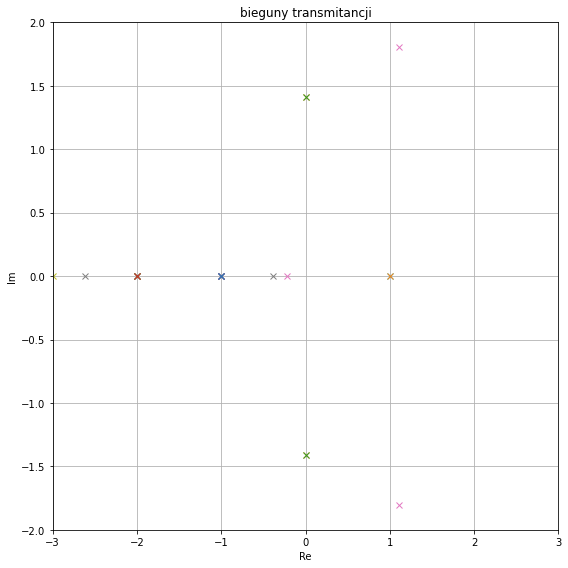

In [18]:
#define list of denominators
denominators = [ [1, 2, 1],
                 [1, 0, 2],
                 [1, 0, 2],
                 [1, 1],
                 [1, 1],
                 [1, 4, 4],
                 [1, -2, 4, 1],
                 [1, 3, 1],
                 [1, 8, 15],
                 [1, 6, -7],
                 [1, 1],
                 [1, -1],
                 [1, 2],
                 [1, 2] ]

fig, ax = plt.subplots(1,1, figsize=poles_figsize)

#for each denominator from list - calculate roots
for denominator in denominators:
    poly = np.poly1d(denominator)
    poles1=np.roots(poly)
    display(poles1)
    ax.plot(poles1.real, poles1.imag,'x')

ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])
ax.grid()
fig.tight_layout()


----
## 3. Sprawdź właściwości systemów
-----------------
* na 1. wykresie umieść charakterystyki amplitudowe wszystkich układów
* na 2. wykresie umieść charakterystyki fazowe wszystkich układów
* na 3. wykresie zaznacz połóożenie zer biegonów dla wszystkich układów

Transmitancje układów:
$$H_1(s) = {{s^2+6s+8} \over {s^2+2s+ 3}}$$
$$H_2(s) = {{s^2-2s-8} \over {s^2+2s+ 3}}$$
$$H_3(s) = {{s^2-6s+8} \over {s^2+2s+ 3}}$$
$$H_4(s) = {{s^2+2s-8} \over {s^2+2s+ 3}}$$

Wskaż układ minimalnofazowy



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\shrap\AppData\Local\Temp/ipykernel_16784/4280720109.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figMP.show()
C:\Users\shrap\AppData\Local\Temp/ipykernel_16784/4280720109.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figZP.show()


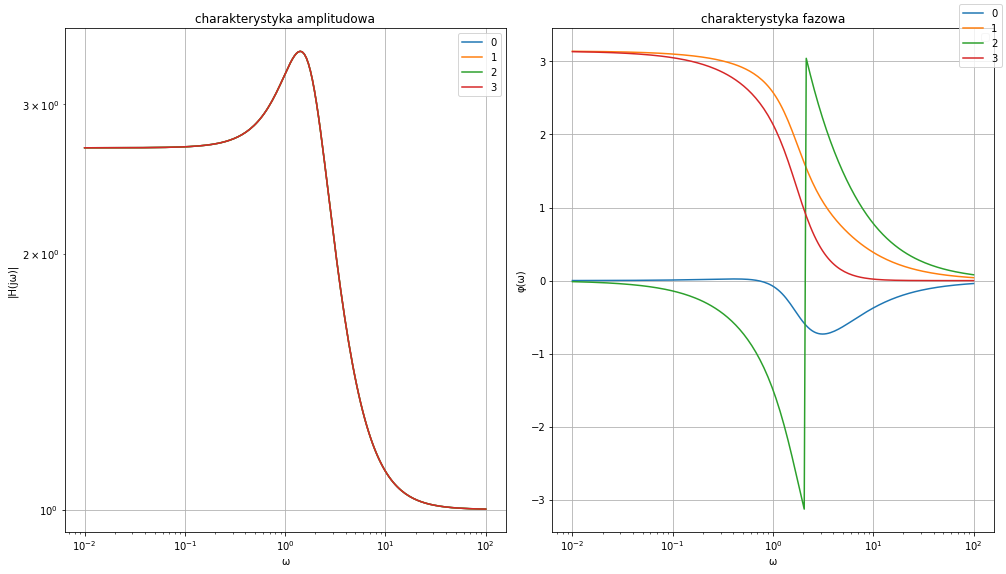

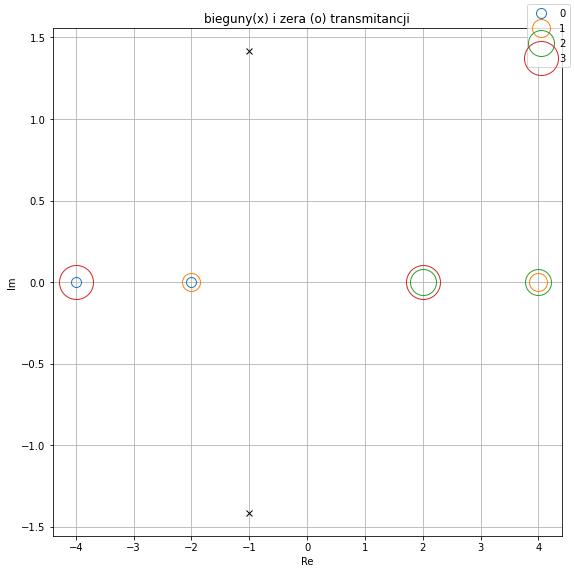

In [19]:
#define list of numerators
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3]


figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize)
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

w1 = np.logspace(-2,2,200)
s = 1j*w1


for idx, numerator in enumerate(numerators):
    #charakterystyka amplitudowa 
    w,H = scipy.signal.freqs(numerator,denominator,w1)
    Ab = np.abs(H)
    F1 = np.angle(H)
    axsMP[0].loglog(w1,Ab, label=str(idx))
    axsMP[1].semilogx(w1,F1)
    axsMP[0].legend()
    axsMP[1].legend()
    zeros = np.roots(numerator)
    poles = np.roots(denominator)
    axZP.plot(zeros.real,zeros.imag, 'o', markerfacecolor='none', markersize=10+8*idx, label = str(idx))

    #charakterystyka fazowa
    #zera transmitancji

axZP.plot(poles.real,poles.imag,'xk')

axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid()
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
figMP.legend()
figMP.tight_layout()
figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
figZP.legend()
axZP.grid()
figZP.tight_layout()
figZP.show()